In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

## Some tips and tricks for the Kinetic Monte Carlo algorithm.

For random numbers use either the `random` module or `np.random`

In [2]:
import random
random.seed(3) # Fix seed so results don't change every time I execute
np.random.seed(3) # same thing for numpy

rates = 10*np.random.rand(4) # just to demo, use four random numbers for our event rates
rates

array([ 5.50797903,  7.08147823,  2.90904739,  5.10827605])

In [3]:
sum_rates = sum(rates)
sum_rates

20.606780693032878

If `sum_rates` is on average about 20 days$^{-1}$, we'd expect the average wait_time to be about 0.05 days

In [4]:
for i in range(5):
    wait_time = random.expovariate( sum_rates )
    print(wait_time)

0.0131880038557
0.038131394448
0.0224180722259
0.0449434183423
0.0476907055852


To pick one of the events, it might help to generate a uniform number between 0 and `sum_rates`

In [5]:
for i in range(5):
    choice = random.uniform(0, sum_rates)
    print(choice)

1.35033883142
0.271349914139
17.257541712
5.34445129511
4.82880672388


## Tricks for slicing arrays

To demonstrate this we need to generate arrays of foxes and times, so we'll quickly do the ODE solve version:

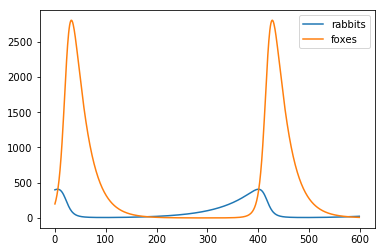

Second peak occurs at (428, 2803.6080735671562)


In [6]:
from scipy.integrate import odeint
k1 = 0.015
k2 = 0.00004
k3 = 0.0004
k4 = 0.04
end_time = 600.
def rates(variables, time):
    """
    Return the right hand side of the ODE
    """
    rabbits, foxes = variables
    rate_rabbits = (k1 * rabbits - k2 * rabbits * foxes)
    rate_foxes = (k3 * rabbits * foxes - k4 * foxes)
    return (rate_rabbits, rate_foxes)

times = np.arange(0, end_time)
initial_conditions = (400., 200.)
result = odeint(rates, initial_conditions, times)
rabbits = result[:,0]
foxes = result[:,1]
plt.plot(times, rabbits, label='rabbits')
plt.plot(times, foxes, label='foxes')
plt.legend(loc="best") # put the legend at the best location to avoid overlapping things
plt.show()
print("Second peak occurs at",(foxes.argmax(),foxes.max()))

First we will use slicing to select every 10th element from the times, rabbits, and foxes arrays
and store in arrays called `times_`, `rabbits_`, `foxes_` just so that we can demonstrate a few tricks without printing 600 numbers that are hard to read.

In [7]:
times_, rabbits_, foxes_  = times[::10], rabbits[::10], foxes[::10]
times_, rabbits_, foxes_

(array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
         180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
         270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
         360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
         450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
         540.,  550.,  560.,  570.,  580.,  590.]),
 array([ 400.        ,  397.34690636,  284.20087989,  126.17206714,
          49.05675683,   22.94054823,   13.59478086,    9.79659472,
           8.1557982 ,    7.52170769,    7.45010576,    7.75254635,
           8.34629412,    9.1981533 ,   10.30134324,   11.66532039,
          13.31117751,   15.26966675,   17.58057604,   20.29288276,
          23.4654166 ,   27.16790903,   31.48238047,   36.50485572,
          42.34742147,   49.1406545 ,   57.03645919,   66.21135838,
          76.87028097,   89.2508772 ,  103.628

If we call a comparison operator on an array, we get an array of Boolean values like this

In [8]:
times_ > 200

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True], dtype=bool)

If we multiply a number by a boolean, then the True is treated as 1 and the False as 0, like this:

In [9]:
5 * (times_>200)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

We can chain these together, for example to make an array of the number of foxes but only containing values corresponding to times > 200 and foxes > 100:

In [10]:
foxes_ * (times_>200) * (foxes_>100)

array([    0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ,     0.        ,   106.95741121,
         351.51775843,  1140.17121455,  2417.31498871,  2779.00007434,
        2301.04907353,  1698.9577386 ,  1204.5944033 ,   840.33771182,
         582.16226638,   402.21093576,   277.77730463,   192.06048582,
         133.10388328,     0.        ,     0.        ,     0.        ,
      

We just sliced out where we want to look for a second peak:

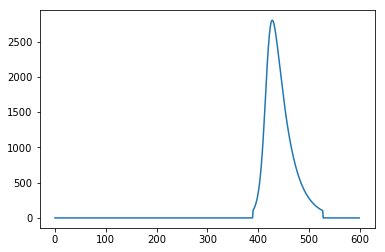

In [11]:
plt.plot(times,foxes*(times>200)*(foxes>100))
plt.show()

Now if we want to find the index of the highest of those values, we can use `np.argmax()` (check its documentation if unsure)

In [12]:
i = np.argmax(foxes_*(times_>200)*(foxes_>100))
i

43

then to find the location (on a fox-v-time plot) of that peak

In [13]:
times_[i], foxes_[i]

(430.0, 2779.0000743363626)

These tricks relied upon using numpy arrays rather than lists.
If you know how big something is going to be before you start, then you can create an empty numpy array to store it in, eg. using `np.zeros()`

In [14]:
runs = 10
average_peak_time = np.zeros(runs)
for i in range(runs):
    average_peak_time[i] = random.random()
average_peak_time

array([ 0.99564484,  0.47026351,  0.83646145,  0.47635321,  0.63906814,
        0.15061642,  0.63486066,  0.86804531,  0.52318121,  0.74125186])

But if you're not sure how long something will be then start with an empty list, append to it, then convert it into a numpy array when you're finished:

In [15]:
times = []
foxes = []
time = 0
while time < 600:
    time += wait_time
    times.append(time)
    foxes.append(1)
times = np.array(times)
foxes = np.array(foxes)
times, foxes

(array([  4.76907056e-02,   9.53814112e-02,   1.43072117e-01, ...,
          5.99949076e+02,   5.99996767e+02,   6.00044458e+02]),
 array([1, 1, 1, ..., 1, 1, 1]))